# **Multiclass Classification using Keras and TensorFlow on Food-101 Dataset**
![alt text](https://www.vision.ee.ethz.ch/datasets_extra/food-101/static/img/food-101.jpg)

### **Download and extract Food 101 Dataset**

In [0]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

In [0]:
! pip install opencv-python


In [0]:
# Check if GPU is enabled
print(tf.__version__)
print(tf.test.gpu_device_name())

2.2.0
/device:GPU:0


In [0]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2020-05-13 05:57:08--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2020-05-13 05:57:08--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz.1’

food-101.tar.gz.1   100%[===================>]   4.65G  9.66MB/s    in 8m 2s   

2020-05-13 06:05:11 (9.89 MB/s) - ‘food-101.tar.gz.1’ saved [4996278331/4996278331]



In [0]:
! rm -r food-101

In [0]:
!tar xzvf food-101.tar.gz.1

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/553447.jpg
food-101/images/cannoli/

In [0]:
! ls 

sample_data


In [0]:
# Helper function to download data and extract
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

* **Commented the below cell as the Food-101 dataset is available from Kaggle Datasets and need not be downloaded..**

In [0]:
# Download data and extract it to folder
# Uncomment this below line if you are on Colab

get_data_extract()

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/553447.jpg
food-101/images/cannoli/3452001.jpg
food-101/images/cannoli/

### **Understand dataset structure and files**

**The dataset being used is [Food 101](https://www.vision.ee.ethz.ch/datasets_extra/food-101/)**
* **This dataset has 101000 images in total. It's a food dataset with 101 categories(multiclass)**
* **Each type of food has 750 training samples and 250 test samples**
* **Note found on the webpage of the dataset :  **  
***On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.***  
* **The entire dataset is 5GB in size**

In [0]:
# Check the extracted dataset folder
!ls content/food-101/

images	license_agreement.txt  meta  README.txt


**images** folder contains 101 folders with 1000 images  each  
Each folder contains images of a specific food class

In [0]:
os.listdir('food-101/images')

['eggs_benedict',
 'frozen_yogurt',
 'mussels',
 'pho',
 'pad_thai',
 'lobster_bisque',
 'chocolate_mousse',
 'beignets',
 'guacamole',
 'club_sandwich',
 'cannoli',
 'spaghetti_carbonara',
 'deviled_eggs',
 'pizza',
 'fish_and_chips',
 'garlic_bread',
 'strawberry_shortcake',
 'hot_dog',
 'french_toast',
 'edamame',
 'spring_rolls',
 'hot_and_sour_soup',
 'french_onion_soup',
 'bruschetta',
 'pulled_pork_sandwich',
 'panna_cotta',
 'fried_calamari',
 'sashimi',
 'red_velvet_cake',
 'gyoza',
 'carrot_cake',
 'ravioli',
 'tuna_tartare',
 'steak',
 'baklava',
 'beet_salad',
 'breakfast_burrito',
 'poutine',
 'chicken_quesadilla',
 'gnocchi',
 'french_fries',
 'nachos',
 'ceviche',
 'caesar_salad',
 'peking_duck',
 'escargots',
 'tiramisu',
 'beef_carpaccio',
 'creme_brulee',
 'cheese_plate',
 'bibimbap',
 'caprese_salad',
 'donuts',
 'foie_gras',
 'waffles',
 'croque_madame',
 'sushi',
 'chicken_curry',
 'scallops',
 'onion_rings',
 'omelette',
 'huevos_rancheros',
 'hummus',
 'pork_chop

**meta** folder contains the text files - train.txt and test.txt  
**train.txt** contains the list of images that belong to training set  
**test.txt** contains the list of images that belong to test set  
**classes.txt** contains the list of all classes of food

In [0]:
os.listdir('food-101/meta')

['train.txt',
 'test.json',
 'test.txt',
 'train.json',
 'labels.txt',
 'classes.txt']

In [0]:
!head food-101/meta/train.txt

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [0]:
!head food-101/meta/classes.txt

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


### **Visualize random image from each of the 101 classes**

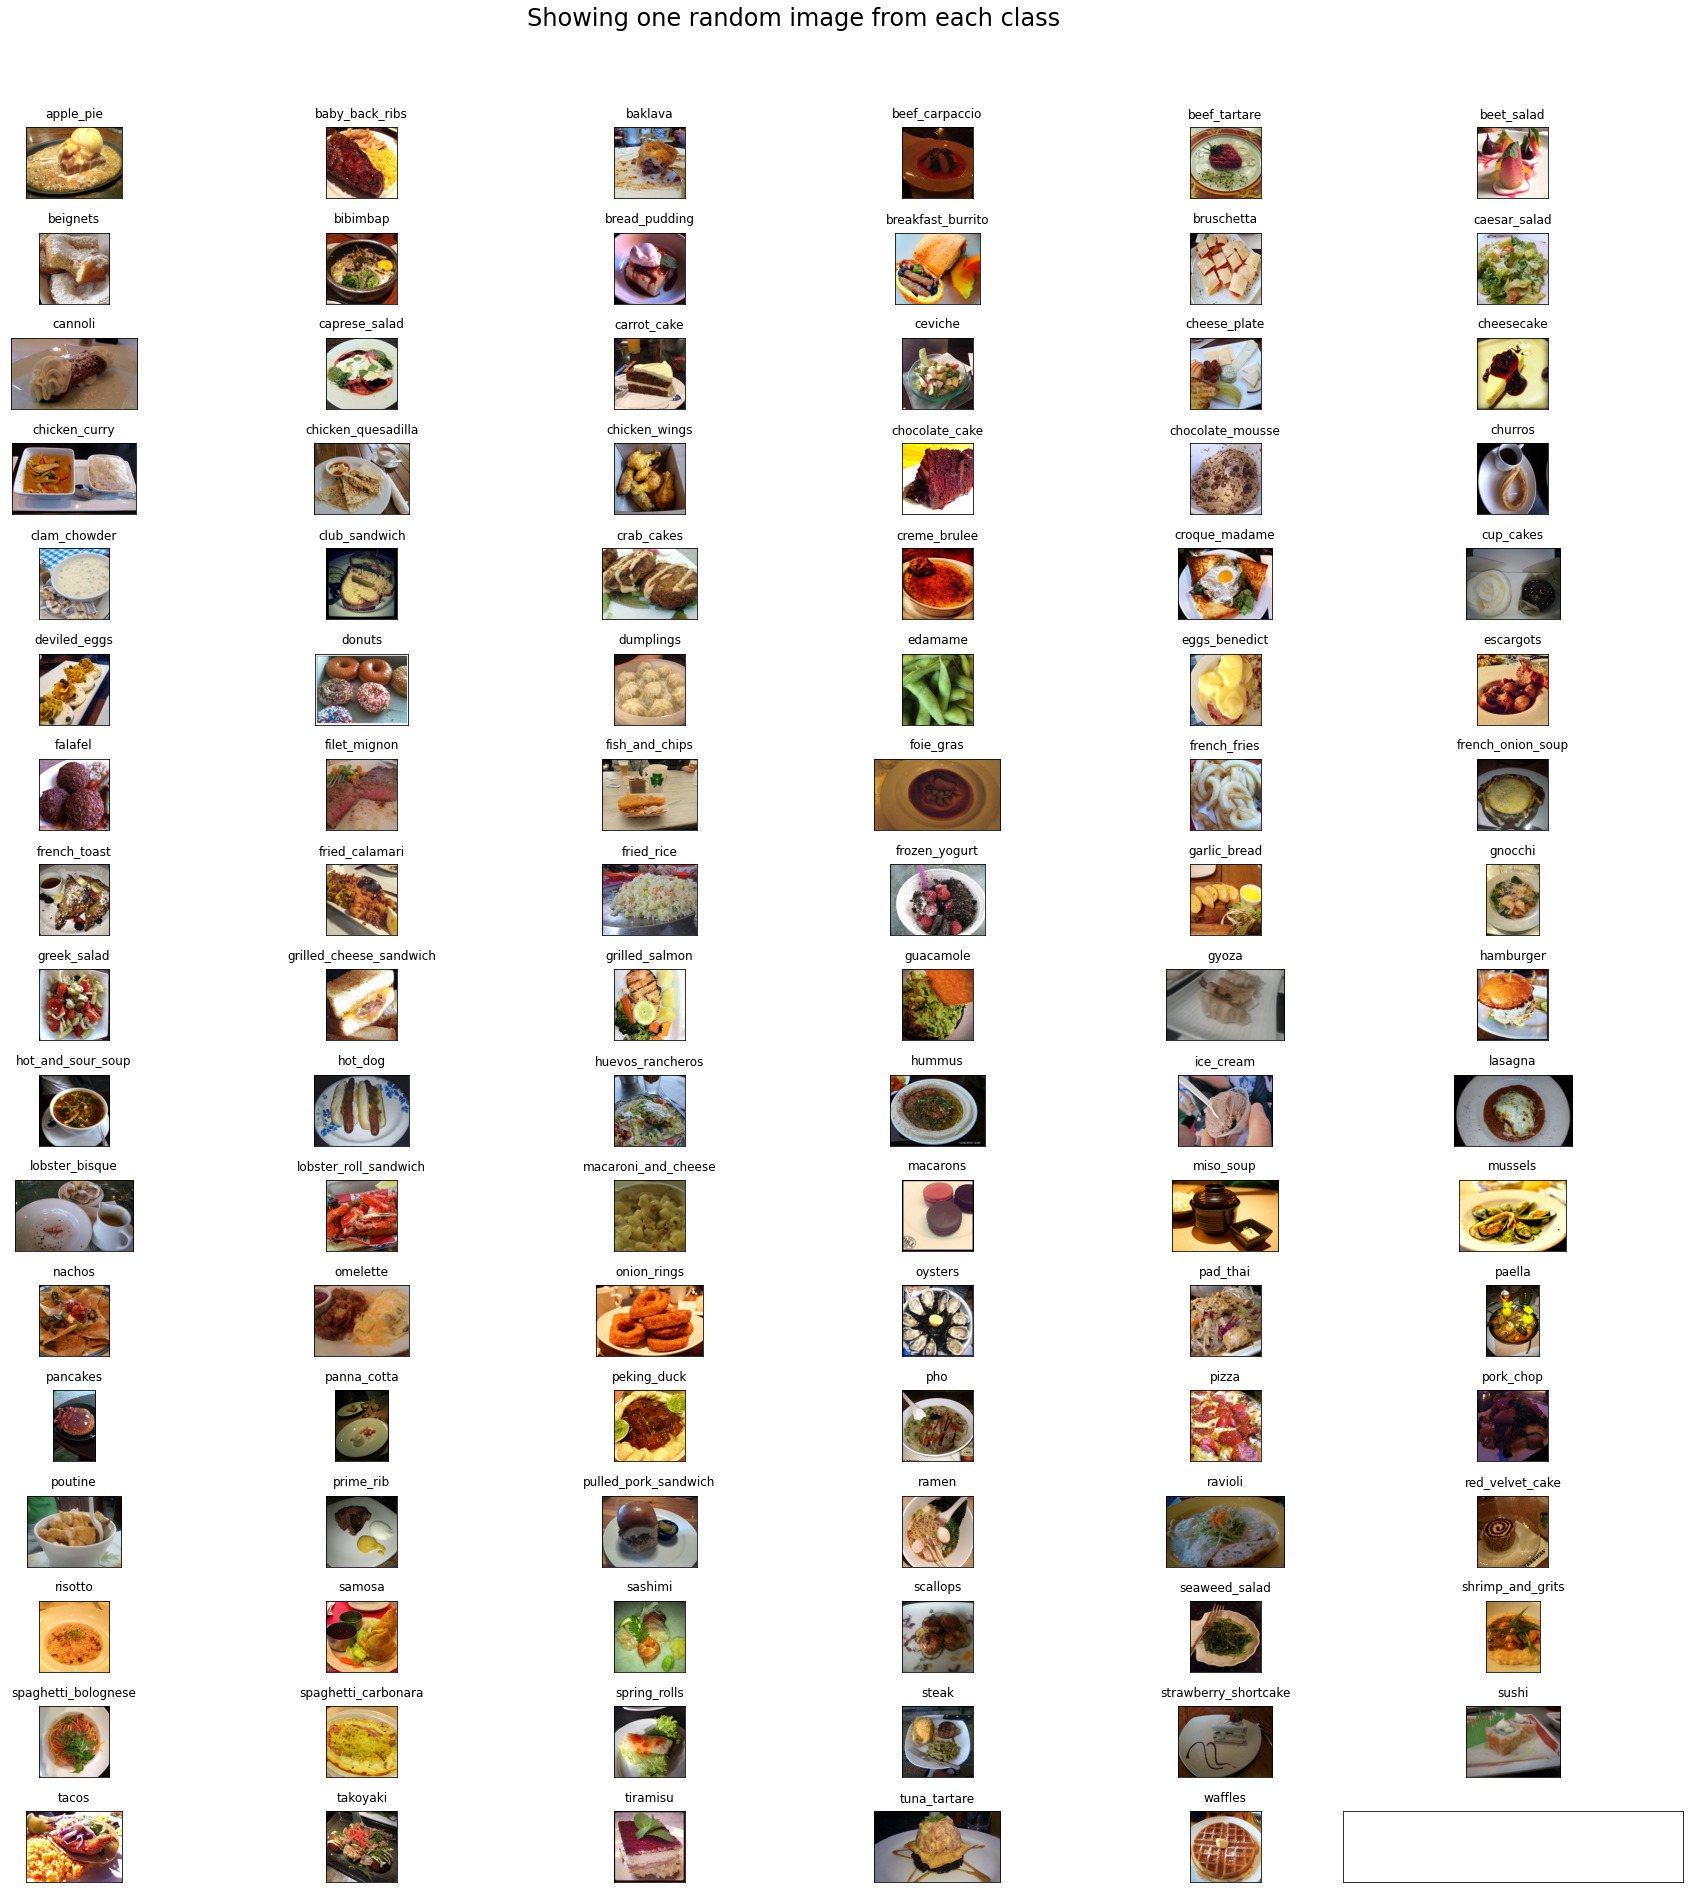

In [0]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html


### **Split the image data into train and test using train.txt and test.txt**

In [0]:
# Helper method to split dataset into train and test folders
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list) 
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [0]:
#%cd content

/content


In [0]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
#
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [0]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [0]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find train -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
75750


In [0]:
# Check how many files are in the test folder
print("Total number of samples in test folder")
!find test -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
25250


### **Create a subset of data with few classes(3) - train_mini and test_mini for experimenting**

* We now have train and test data ready  
* But to experiment and try different architectures, working on the whole data with 101 classes takes a lot of time and computation  
* To proceed with further experiments, I am creating train_min and test_mini, limiting the dataset to 3 classes  
* Since the original problem is multiclass classification which makes key aspects of architectural decisions different from that of binary classification, choosing 3 classes is a good start instead of 2

In [0]:
# List of all 101 types of foods(sorted alphabetically)
#del foods_sorted[0] # remove .DS_Store from the list

In [0]:
foods_sorted[0]

'apple_pie'

In [0]:
# Helper method to create train_mini and test_mini data samples
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))
      

In [0]:
# picking 3 food items and generating separate data folders for the same
food_list = ['ice_cream','ramen','pad_thai','fried_rice','chicken_curry','hot_and_sour_soup','french_onion_soup']
src_train = 'train'
dest_train = 'train_mini'
src_test = 'test'
dest_test = 'test_mini'

In [0]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into ice_cream
Copying images into ramen
Copying images into pad_thai
Copying images into fried_rice
Copying images into chicken_curry
Copying images into hot_and_sour_soup
Copying images into french_onion_soup


In [0]:
print("Total number of samples in train folder")

!find train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
5250


In [0]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into ice_cream
Copying images into ramen
Copying images into pad_thai
Copying images into fried_rice
Copying images into chicken_curry
Copying images into hot_and_sour_soup
Copying images into french_onion_soup


In [0]:
print("Total number of samples in test folder")
!find test_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
1750


### **Fine tune Inception Pretrained model using Food 101 dataset**

* Keras and other Deep Learning libraries provide pretrained models  
* These are deep neural networks with efficient architectures(like VGG,Inception,ResNet) that are already trained on datasets like ImageNet  
* Using these pretrained models, we can use the already learned weights and add few layers on top to finetune the model to our new data  
* This helps in faster convergance and saves time and computation when compared to models trained from scratch

* We currently have a subset of dataset with 3 classes - samosa, pizza and omelette  
* Use the below code to finetune Inceptionv3 pretrained model

In [0]:
import datetime


In [0]:
K.clear_session()
n_classes = 3
img_width, img_height = 299, 299
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 2250 #75750
nb_validation_samples = 750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(7,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_3class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_3class.log')
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=30,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer,tensorboard_callback])

model.save('model_trained_3class.hdf5')


Found 5250 images belonging to 7 classes.
Found 1750 images belonging to 7 classes.
Epoch 1/30
140/140 [==============================] - ETA: 0s - loss: 1.9495 - accuracy: 0.2625
Epoch 00001: val_loss improved from inf to 1.69759, saving model to best_model_3class.hdf5
140/140 [==============================] - 59s 424ms/step - loss: 1.9495 - accuracy: 0.2625 - val_loss: 1.6976 - val_accuracy: 0.5285
Epoch 2/30
140/140 [==============================] - ETA: 0s - loss: 1.6269 - accuracy: 0.5040
Epoch 00002: val_loss improved from 1.69759 to 1.34139, saving model to best_model_3class.hdf5
140/140 [==============================] - 58s 415ms/step - loss: 1.6269 - accuracy: 0.5040 - val_loss: 1.3414 - val_accuracy: 0.6997
Epoch 3/30
140/140 [==============================] - ETA: 0s - loss: 1.3380 - accuracy: 0.6442
Epoch 00003: val_loss improved from 1.34139 to 1.01741, saving model to best_model_3class.hdf5
140/140 [==============================] - 58s 416ms/step - loss: 1.3380 - accu

In [0]:
!unzip tb_logs.zip 

Archive:  tb_logs.zip
   creating: tb_logs/
   creating: tb_logs/im2ingr/
 extracting: tb_logs/im2ingr/events.out.tfevents.1588719666.psnqdn0lf  
 extracting: tb_logs/im2ingr/events.out.tfevents.1588720013.psnqdn0lf  
 extracting: tb_logs/im2ingr/events.out.tfevents.1588720264.psnqdn0lf  
  inflating: tb_logs/im2ingr/events.out.tfevents.1588722391.psnqdn0lf  
  inflating: tb_logs/im2ingr/tensorboard_all_scalars.json  
   creating: tb_logs/model/
 extracting: tb_logs/model/events.out.tfevents.1588719767.psnqdn0lf  


In [0]:
!unzip tb_logs.zip 

Archive:  tb_logs.zip
   creating: tb_logs/
   creating: tb_logs/im2ingr/
   creating: tb_logs/model/
  inflating: tb_logs/im2ingr/events.out.tfevents.1589589655.psnqdn0lf  
  inflating: tb_logs/im2ingr/tensorboard_all_scalars.json  
  inflating: tb_logs/model/events.out.tfevents.1589598875.psnqdn0lf  


In [0]:
class_map_3 = train_generator.class_indices
class_map_3

In [0]:
!mv best_model_3class.hdf5 content/


In [0]:
!ls -l


total 181632
drwxr-xr-x   1 root root      4096 May  4 16:19 bin
drwxr-xr-x   2 root root      4096 Apr 24  2018 boot
drwxr-xr-x   1 root root      4096 May 13 06:45 content
drwxr-xr-x   1 root root      4096 May  8 16:45 datalab
drwxr-xr-x   5 root root       440 May 13 05:47 dev
-rw-r--r--   1 root root   4078115 May  8 16:17 dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl
-rw-r--r--   1 root root   4068717 May  8 16:17 dlib-19.18.0-cp36-cp36m-linux_x86_64.whl
drwxr-xr-x   1 root root      4096 May 13 05:47 etc
-rw-r--r--   1 root root      2432 May 13 06:40 history_3class.log
drwxr-xr-x   2 root root      4096 Apr 24  2018 home
drwxr-xr-x   1 root root      4096 May  4 16:20 lib
drwxr-xr-x   2 root root      4096 May  4 16:14 lib32
drwxr-xr-x   2 root root      4096 Oct 29  2019 lib64
drwxr-xr-x   2 root root      4096 Oct 29  2019 media
drwxr-xr-x   2 root root      4096 Oct 29  2019 mnt
-rw-r--r--   1 root root 177719240 May 13 06:40 model_trained_3class.hdf5
drwxr-xr-x   1 root root   

### **Visualize the accuracy and loss plots**

In [0]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


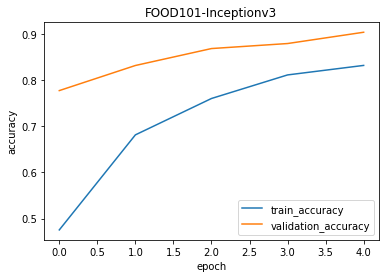

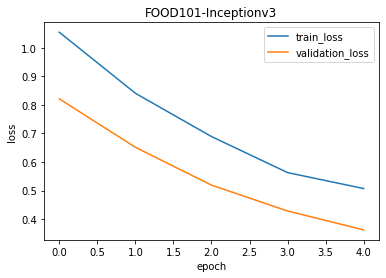

In [0]:
plot_accuracy(history,'FOOD101-Inceptionv3')
plot_loss(history,'FOOD101-Inceptionv3')

* **The plots show that the accuracy of the model increased with epochs and the loss has decreased**
* **Validation accuracy has been on the higher side than training accuracy for many epochs**
* **This could be for several reasons:**
  * We used a pretrained model trained on ImageNet which contains data from a variety of classes
  * Using dropout can lead to a higher validation accuracy

 


### **Predicting classes for new images from internet using the best trained model**

In [0]:
%%time
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('best_model_3class.hdf5',compile = False)

CPU times: user 3.99 s, sys: 214 ms, total: 4.2 s
Wall time: 4.24 s


* **Setting compile=False and clearing the session leads to faster loading of the saved model**
* **Withouth the above addiitons, model loading was taking more than a minute!**

In [0]:
food_list = ['ice_cream','ramen','pad_thai','fried_rice','chicken_curry','hot_and_sour_soup','french_onion_soup']

def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

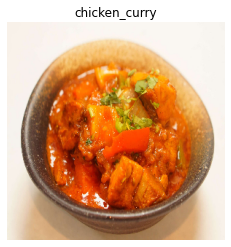

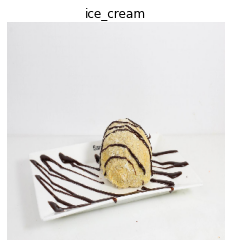

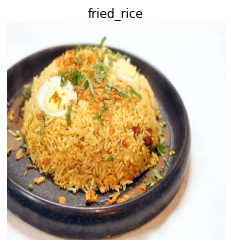

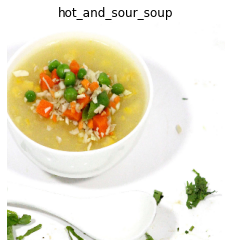

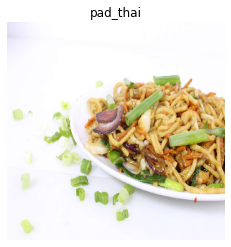

In [0]:
# Make a list of downloaded images and test the trained model
images = ['ibg-indian-chicken-kadhai.jpg',
 'ibg-endings-icecream-fried.jpg',
 'ibg-indian-biryani-chicken.jpg',
 'sweetcorn-veg-soup.jpg',
 'ibg-noodles-lomein-mod.jpg']


predict_class(model_best, images, True)

* Above are some sample predictions